In [183]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [184]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [185]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [186]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [187]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [188]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [189]:
def cross_val_scoring(reg, scoring):
    scores = cross_val_score(reg, X, y, cv=3, scoring=scoring)
    print('%.7f' % scores.mean())

In [190]:
cross_val_scoring(DecisionTreeClassifier(), 'accuracy')

0.4446529


In [191]:
cross_val_scoring(BaggingClassifier(n_estimators=100), 'accuracy')

0.5553471


In [192]:
cross_val_scoring(RandomForestClassifier(n_estimators=100), 'accuracy')

0.5666041


RandomForestClassifier() показал лучший результат

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [194]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [195]:
trees = [10, 50, 100] + [i for i in range(200,5001,200)]
scores = []
trees

[10,
 50,
 100,
 200,
 400,
 600,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000,
 2200,
 2400,
 2600,
 2800,
 3000,
 3200,
 3400,
 3600,
 3800,
 4000,
 4200,
 4400,
 4600,
 4800,
 5000]

In [196]:
for tree in trees:
    model = RandomForestClassifier(n_estimators=tree, n_jobs=-1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
df = pd.DataFrame({'trees' : trees, 'scores' : scores})
df

,trees,scores
0,10,0.625000
1,50,0.666667
2,100,0.643750
3,200,0.645833
4,400,0.662500
5,600,0.654167
6,800,0.650000
7,1000,0.654167
8,1200,0.647917
9,1400,0.652083


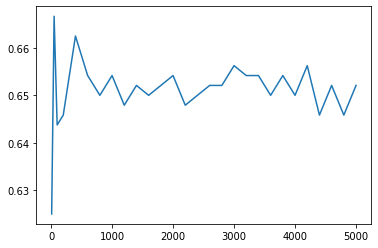

In [197]:
plt.plot(df.trees, df.scores)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [198]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [199]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring ='accuracy').mean()

0.5384615384615384

In [200]:
le = LabelEncoder()
y_1 = le.fit_transform(y)
cross_val_score(XGBClassifier(), X, y_1, cv=3, scoring ='accuracy').mean()

0.5284552845528455

GradientBoostingClassifier() с параметрами по умолчанию показывает результат немного лучше

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
parameters = {'learning_rate': np.linspace(0.01,1,10),
                  'n_estimators' : range (1, 10),
                  'max_depth'    : range (1, 10)
                 }

In [203]:
def search_best_params(model, param_grid, X, y):
    grid_search  = GridSearchCV(model, param_grid = param_grid, cv = 3, n_jobs=-1)
    %time grid_search.fit(X, y)
    print(grid_search.best_params_)
    cross_val = cross_val_score(model, X, y, cv=3, scoring ='accuracy').mean()
    print(f'accuracy: {cross_val}')

In [204]:
search_best_params(GradientBoostingClassifier(), parameters, X, y)

CPU times: total: 10.1 s
Wall time: 1min 15s
{'learning_rate': 0.23, 'max_depth': 2, 'n_estimators': 8}
accuracy: 0.5409631019387117


In [205]:
search_best_params(XGBClassifier(), parameters, X, y_1)

CPU times: total: 5.47 s
Wall time: 20.9 s
{'learning_rate': 0.78, 'max_depth': 3, 'n_estimators': 4}
accuracy: 0.5284552845528455


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [206]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [207]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring ='accuracy').mean()

0.5397123202001252

In [208]:
cross_val_score(XGBClassifier(), X, y_1, cv=3, scoring ='accuracy').mean()

0.5284552845528455

In [209]:
cross_val_score(LGBMClassifier(), X, y, cv=3, scoring ='accuracy').mean()

0.5284552845528455

In [210]:
cross_val_score(CatBoostClassifier(verbose=False), X, y, cv=3, scoring ='accuracy').mean()

0.5328330206378987

GradientBoostingClassifier показывает лучший результат. XGBClassifier и LGBMClassifier показали абсолютно одинаковые результаты

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [211]:
search_best_params(LGBMClassifier(), parameters, X, y)

CPU times: total: 2.52 s
Wall time: 7.87 s
{'learning_rate': 0.23, 'max_depth': 3, 'n_estimators': 7}
accuracy: 0.5284552845528455


In [212]:
search_best_params(CatBoostClassifier(verbose=False), parameters, X, y)

CPU times: total: 9.5 s
Wall time: 1min 22s
{'learning_rate': 0.34, 'max_depth': 5, 'n_estimators': 8}
accuracy: 0.5328330206378987


LGBMClassifier самый быстрый. CatBoostClassifier самый медленный

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [213]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [214]:
def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, X, y_1, cv=3).mean()
    print(current_score, params)
    return -current_score


simple_space_xgb = {
            'n_estimators': hp.choice('n_estimators', range(1, 10, 1)),
            'learning_rate': hp.uniform('learning_rate', 0.01, 1),
            'max_depth':  hp.choice('max_depth', range(1, 10, 1)),
}

best = fmin(fn=hyperopt_xgb_score, space=simple_space_xgb, algo=tpe.suggest, max_evals=10, verbose=False)
print('best:')
print(best)

0.551594746716698 {'learning_rate': 0.6161950760241054, 'max_depth': 6, 'n_estimators': 4}
0.541588492808005 {'learning_rate': 0.9534599443212952, 'max_depth': 4, 'n_estimators': 4}
0.559724828017511 {'learning_rate': 0.2883596775266022, 'max_depth': 8, 'n_estimators': 7}
0.551594746716698 {'learning_rate': 0.30793678827091187, 'max_depth': 6, 'n_estimators': 9}
0.5590994371482175 {'learning_rate': 0.22774168216674076, 'max_depth': 5, 'n_estimators': 2}
0.5522201375859912 {'learning_rate': 0.7914619297144444, 'max_depth': 4, 'n_estimators': 1}
0.5628517823639775 {'learning_rate': 0.5919171931511564, 'max_depth': 3, 'n_estimators': 8}
0.5747342088805504 {'learning_rate': 0.5422387848949046, 'max_depth': 2, 'n_estimators': 6}
0.5440900562851781 {'learning_rate': 0.44343744150287656, 'max_depth': 1, 'n_estimators': 1}
0.5447154471544715 {'learning_rate': 0.8516298292099501, 'max_depth': 8, 'n_estimators': 2}
best:
{'learning_rate': 0.5422387848949046, 'max_depth': 1, 'n_estimators': 5}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [215]:
from sklearn.ensemble import StackingClassifier

In [223]:
estimators = [
    ('cbc', CatBoostClassifier()),
    ('lgbmc', LGBMClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('xgbc', XGBClassifier())
]
stacked = StackingClassifier(estimators=estimators)
%time cross_val_score(stacked, X, y, scoring='accuracy', cv=3, n_jobs=-1).mean()

CPU times: total: 15.6 ms
Wall time: 1min 19s


0.5741088180112571

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [224]:
estimators = [
    ('cbc', CatBoostClassifier(learning_rate=0.34, max_depth=5, n_estimators=8)),
    ('lgbmc', LGBMClassifier(learning_rate=0.23, max_depth=3, n_estimators=7)),
    ('gbc', GradientBoostingClassifier(learning_rate=0.23, max_depth=2, n_estimators=8)),
    ('xgbc', XGBClassifier(learning_rate=0.78, max_depth=3, n_estimators=4))
]
stacked = StackingClassifier(estimators=estimators)
%time cross_val_score(stacked, X, y, scoring='accuracy', cv=3, n_jobs=-1).mean()

CPU times: total: 15.6 ms
Wall time: 5.17 s


0.5797373358348968

Результат стал немного лучше. В данном случае это не особо показательно. А вот скорость выполнения выросла очень существенно.